Categorical variables are usually represented as ‘strings’ or ‘categories’ and are finite in number.

we can see there are two kinds of categorical data-

    Ordinal Data: The categories have an inherent order
    Nominal Data: The categories do not have an inherent order    

https://analyticsindiamag.com/a-complete-guide-to-categorical-data-encoding/

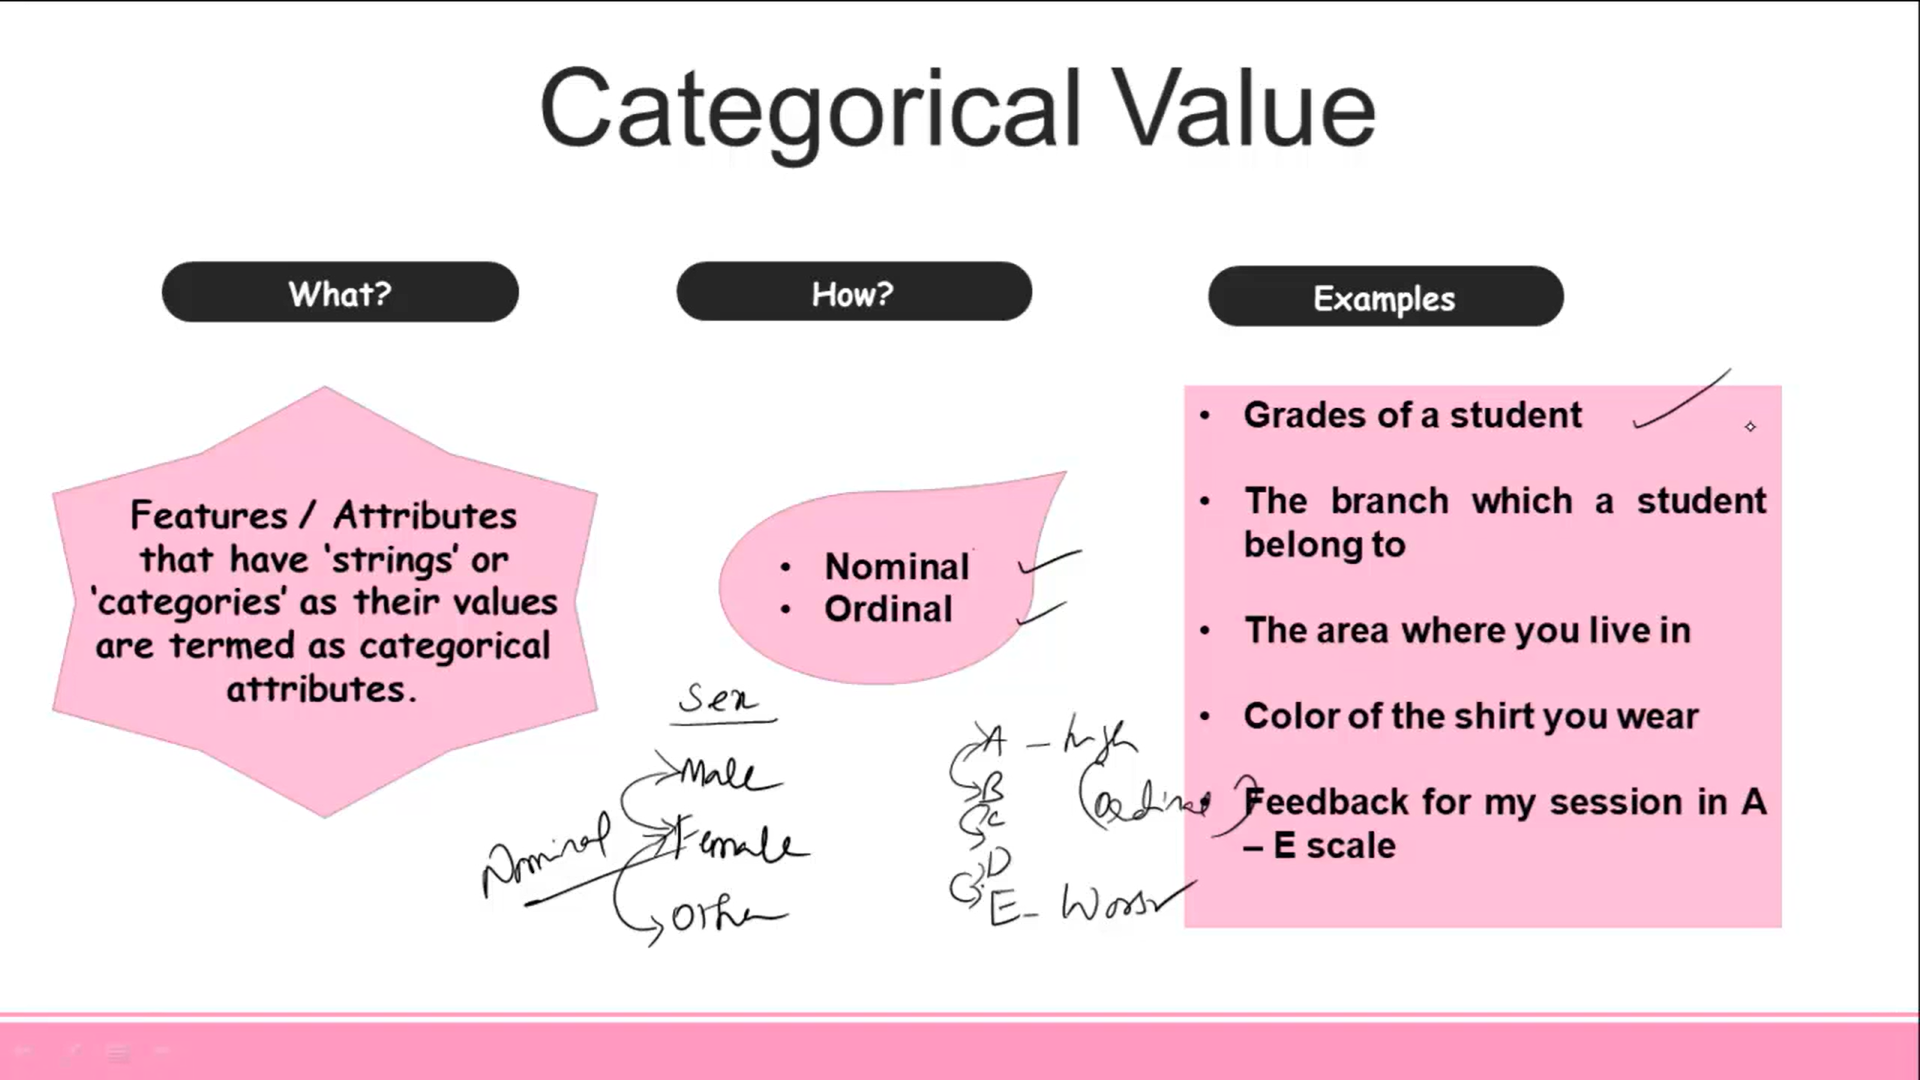

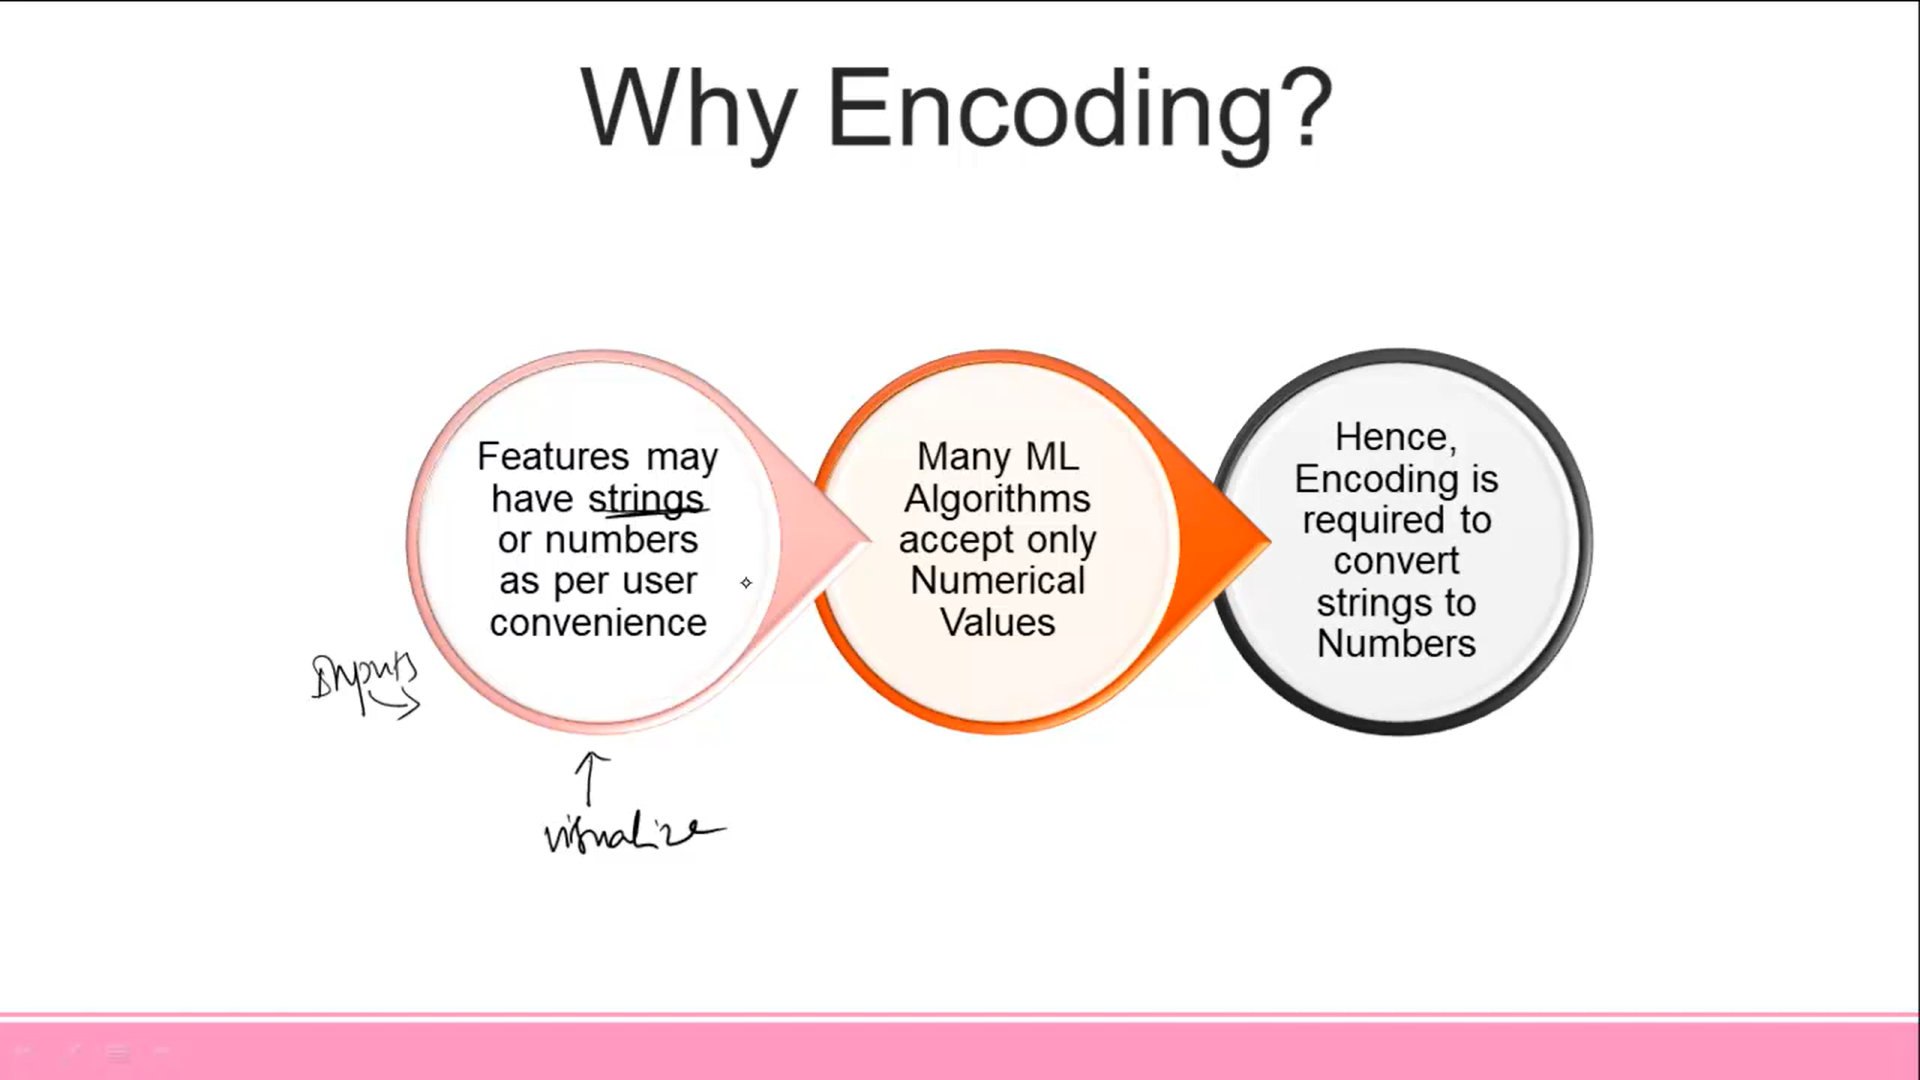

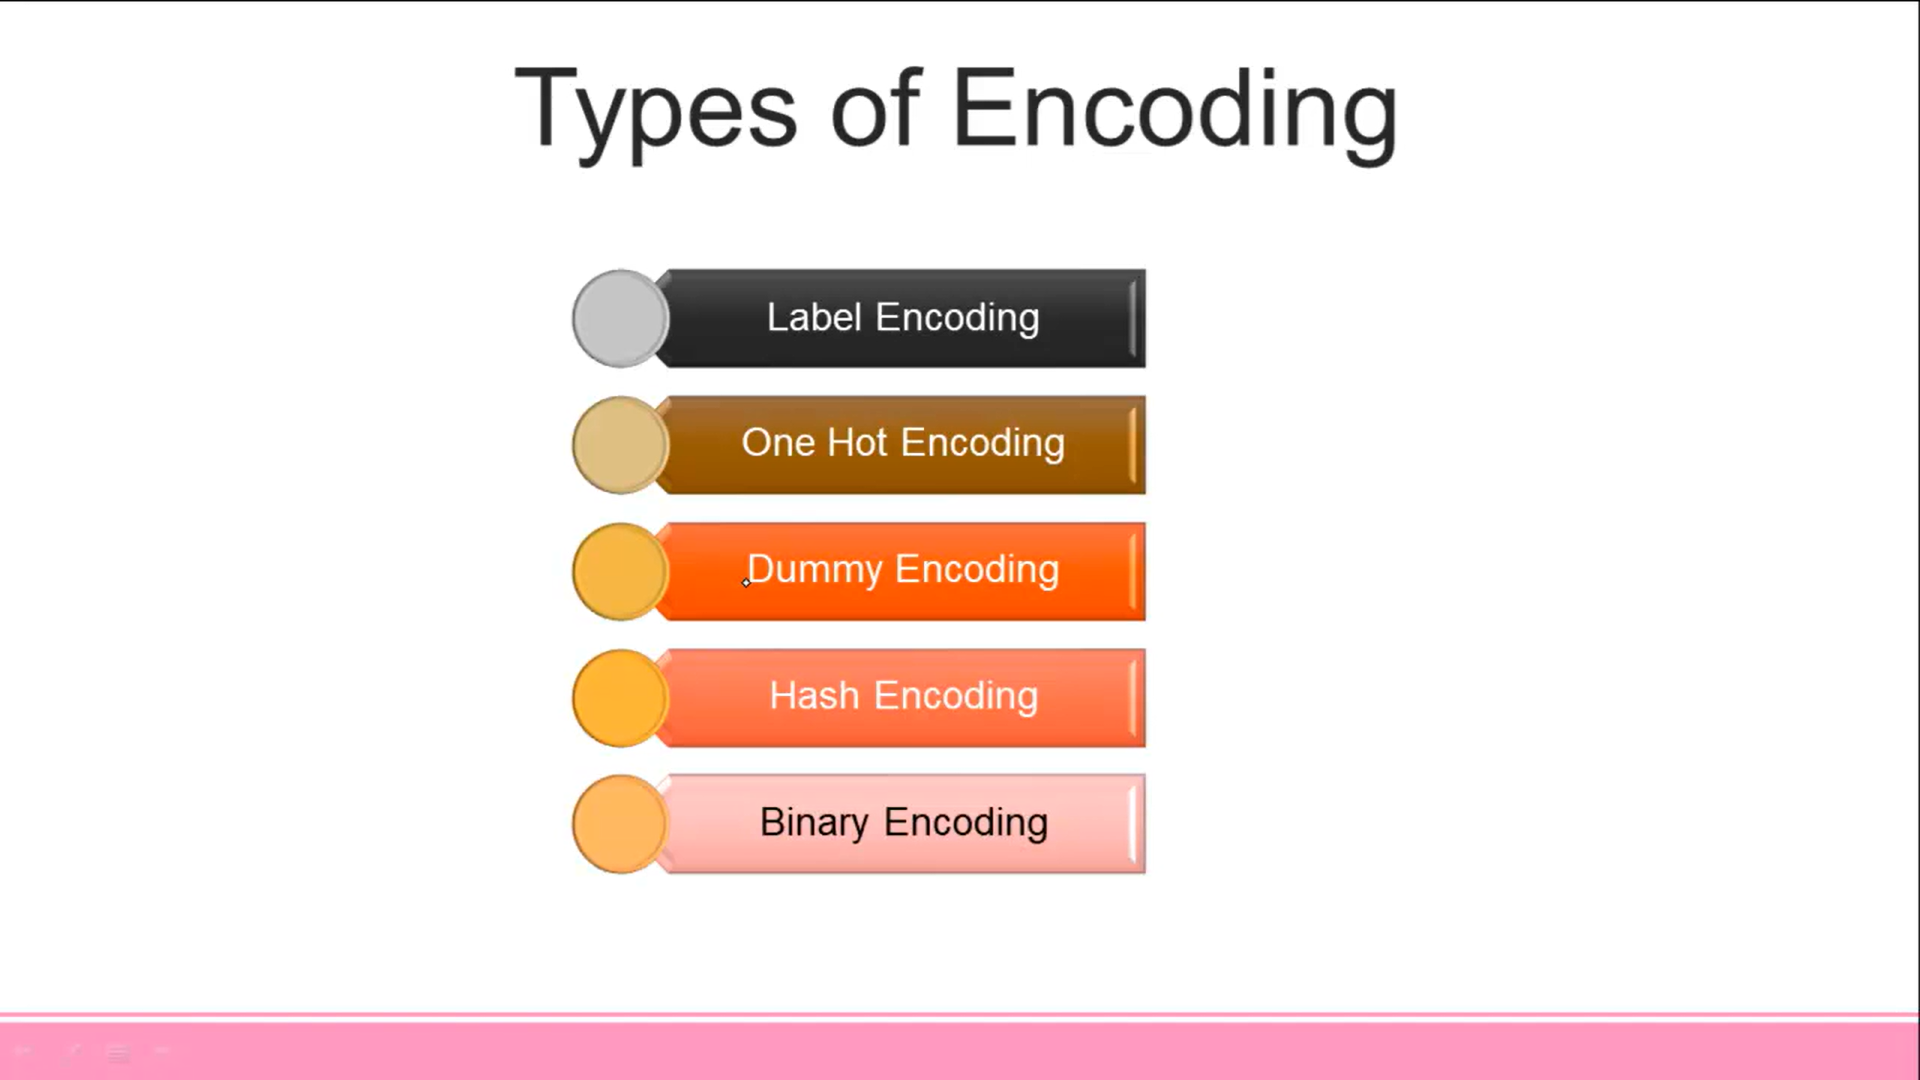

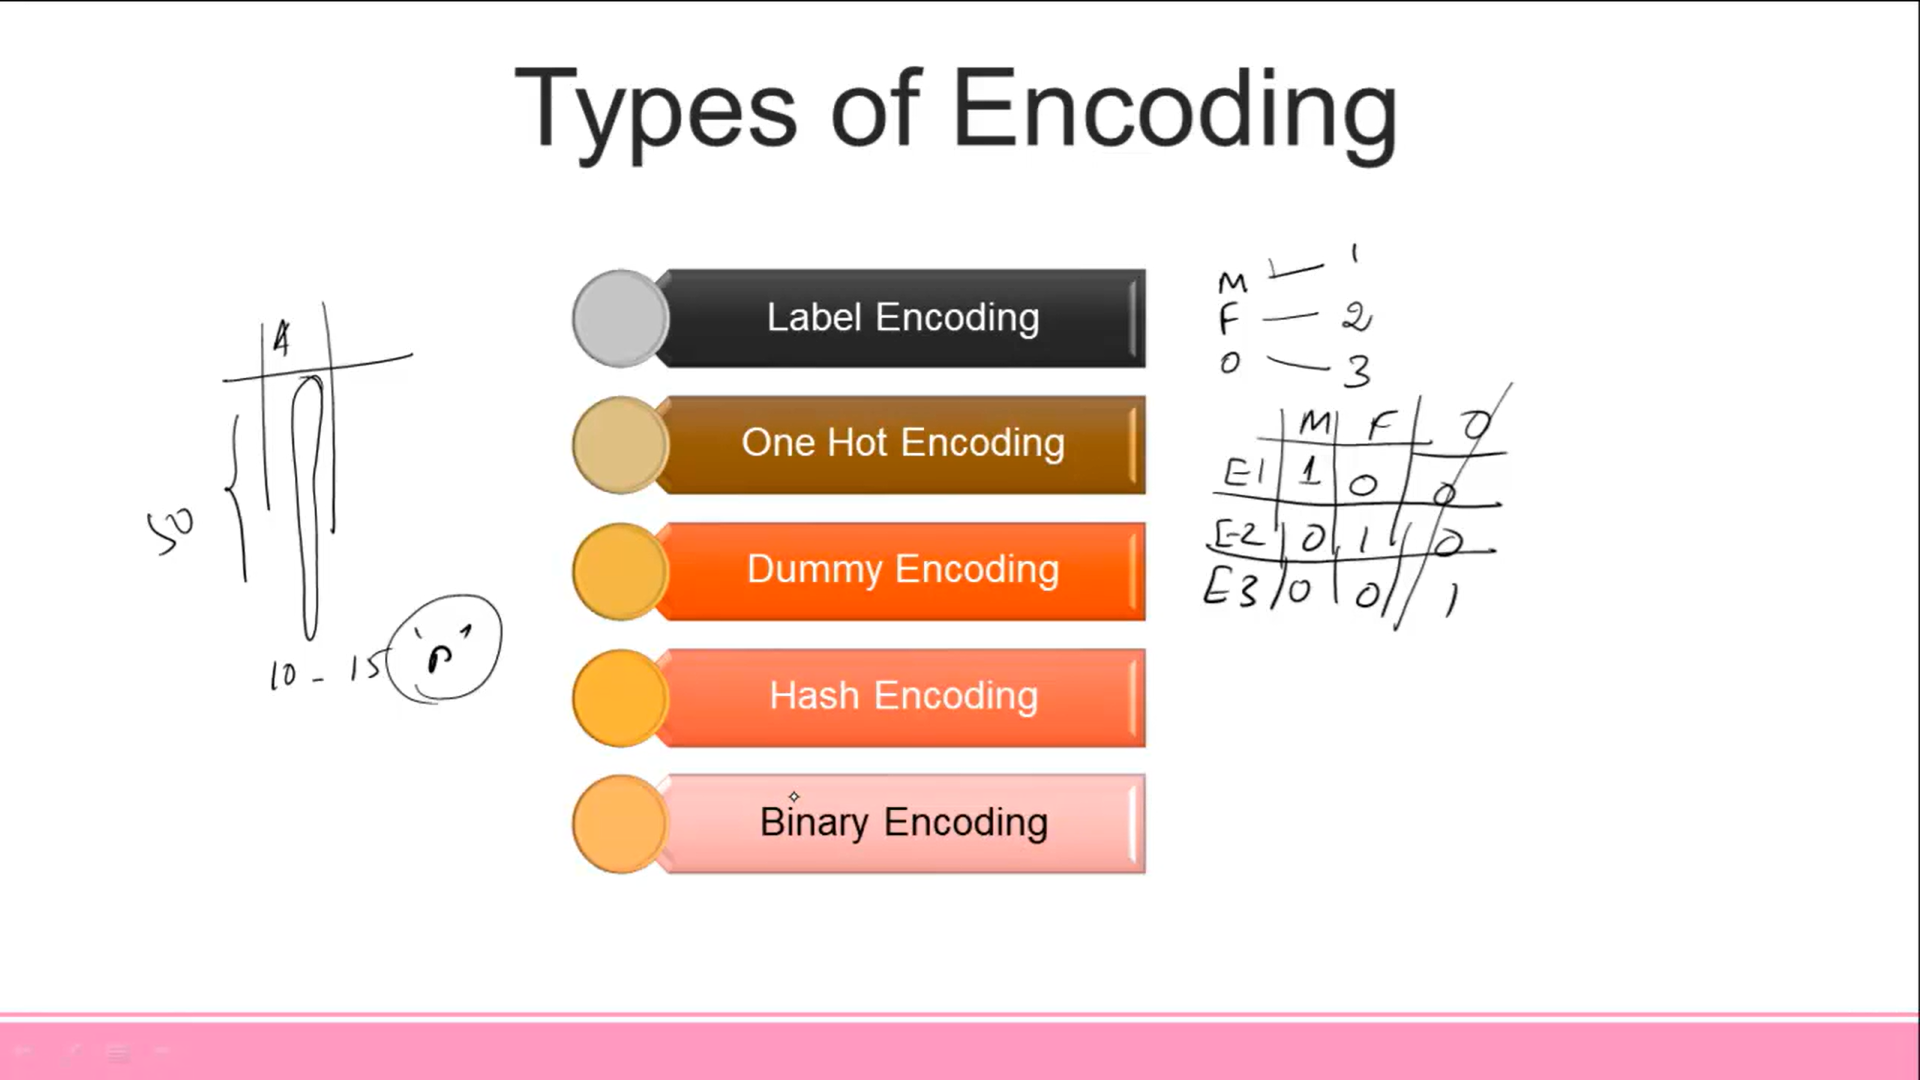

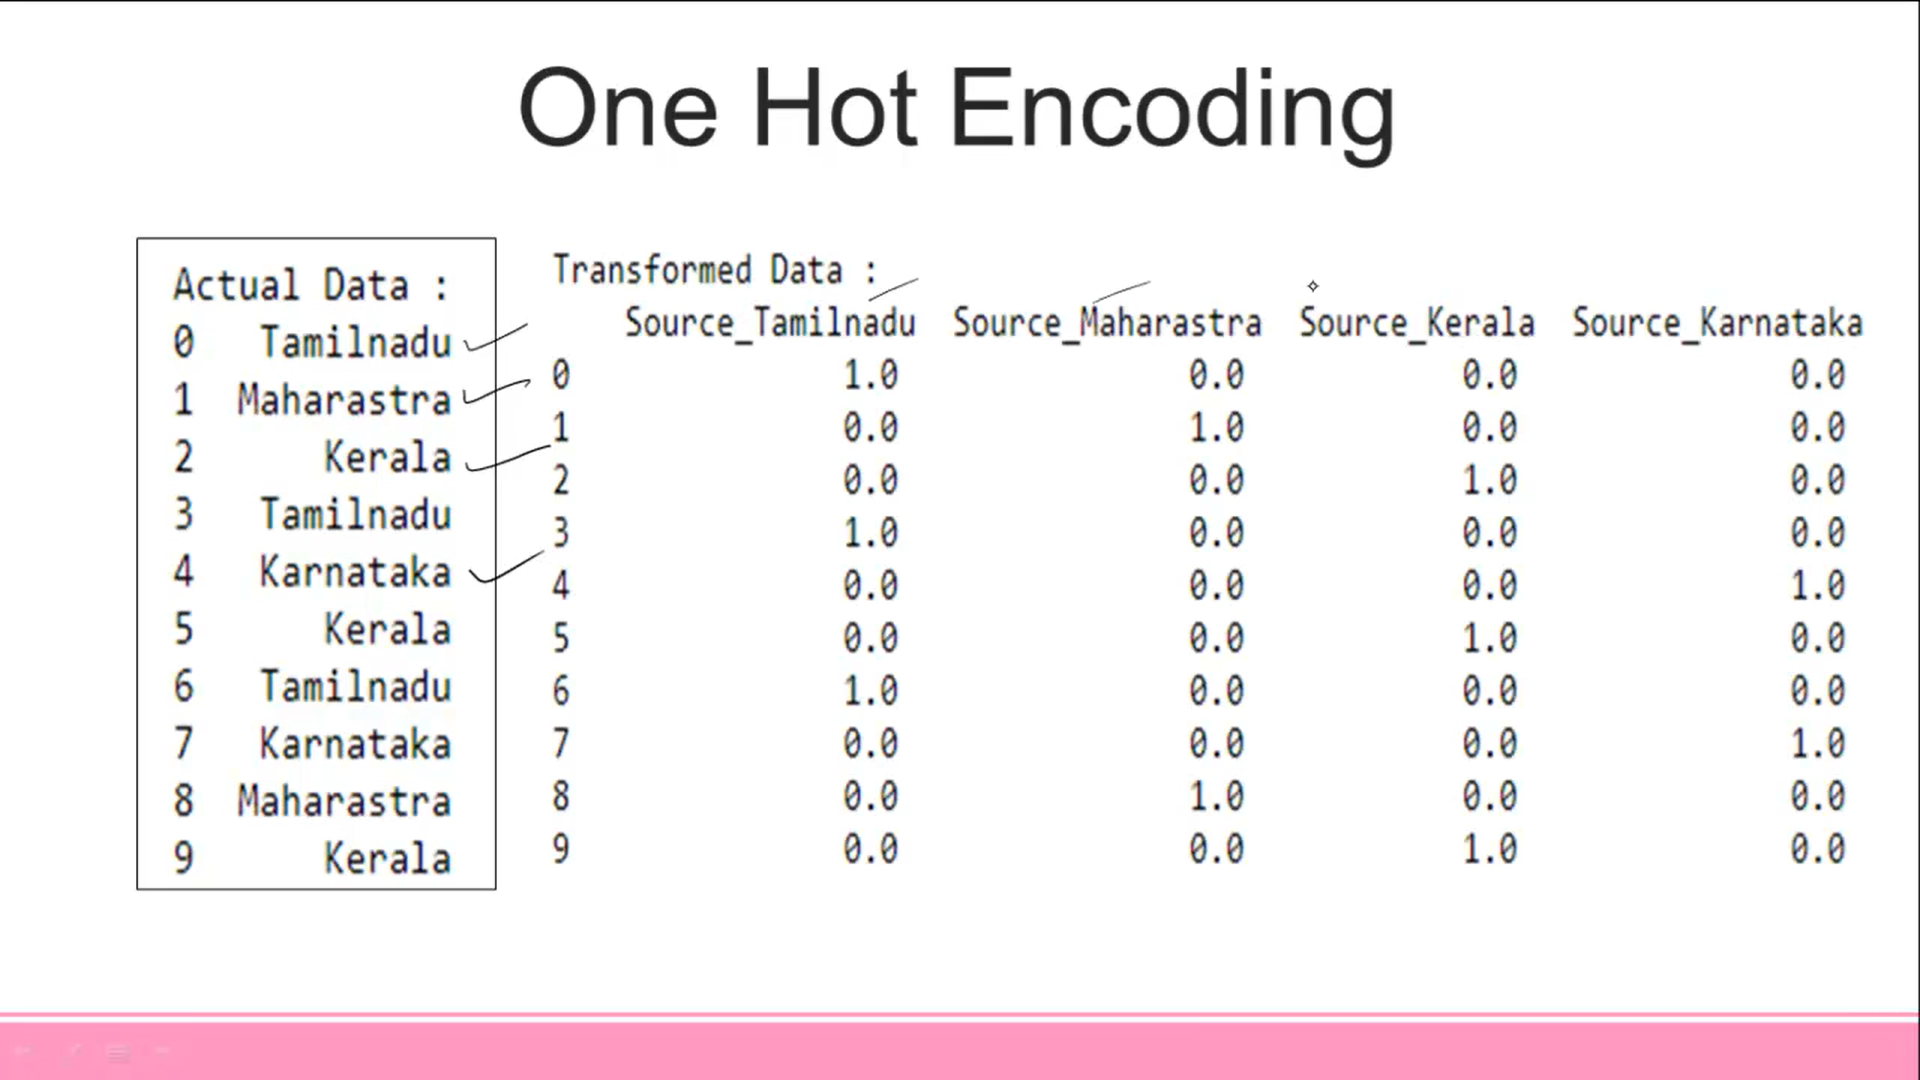

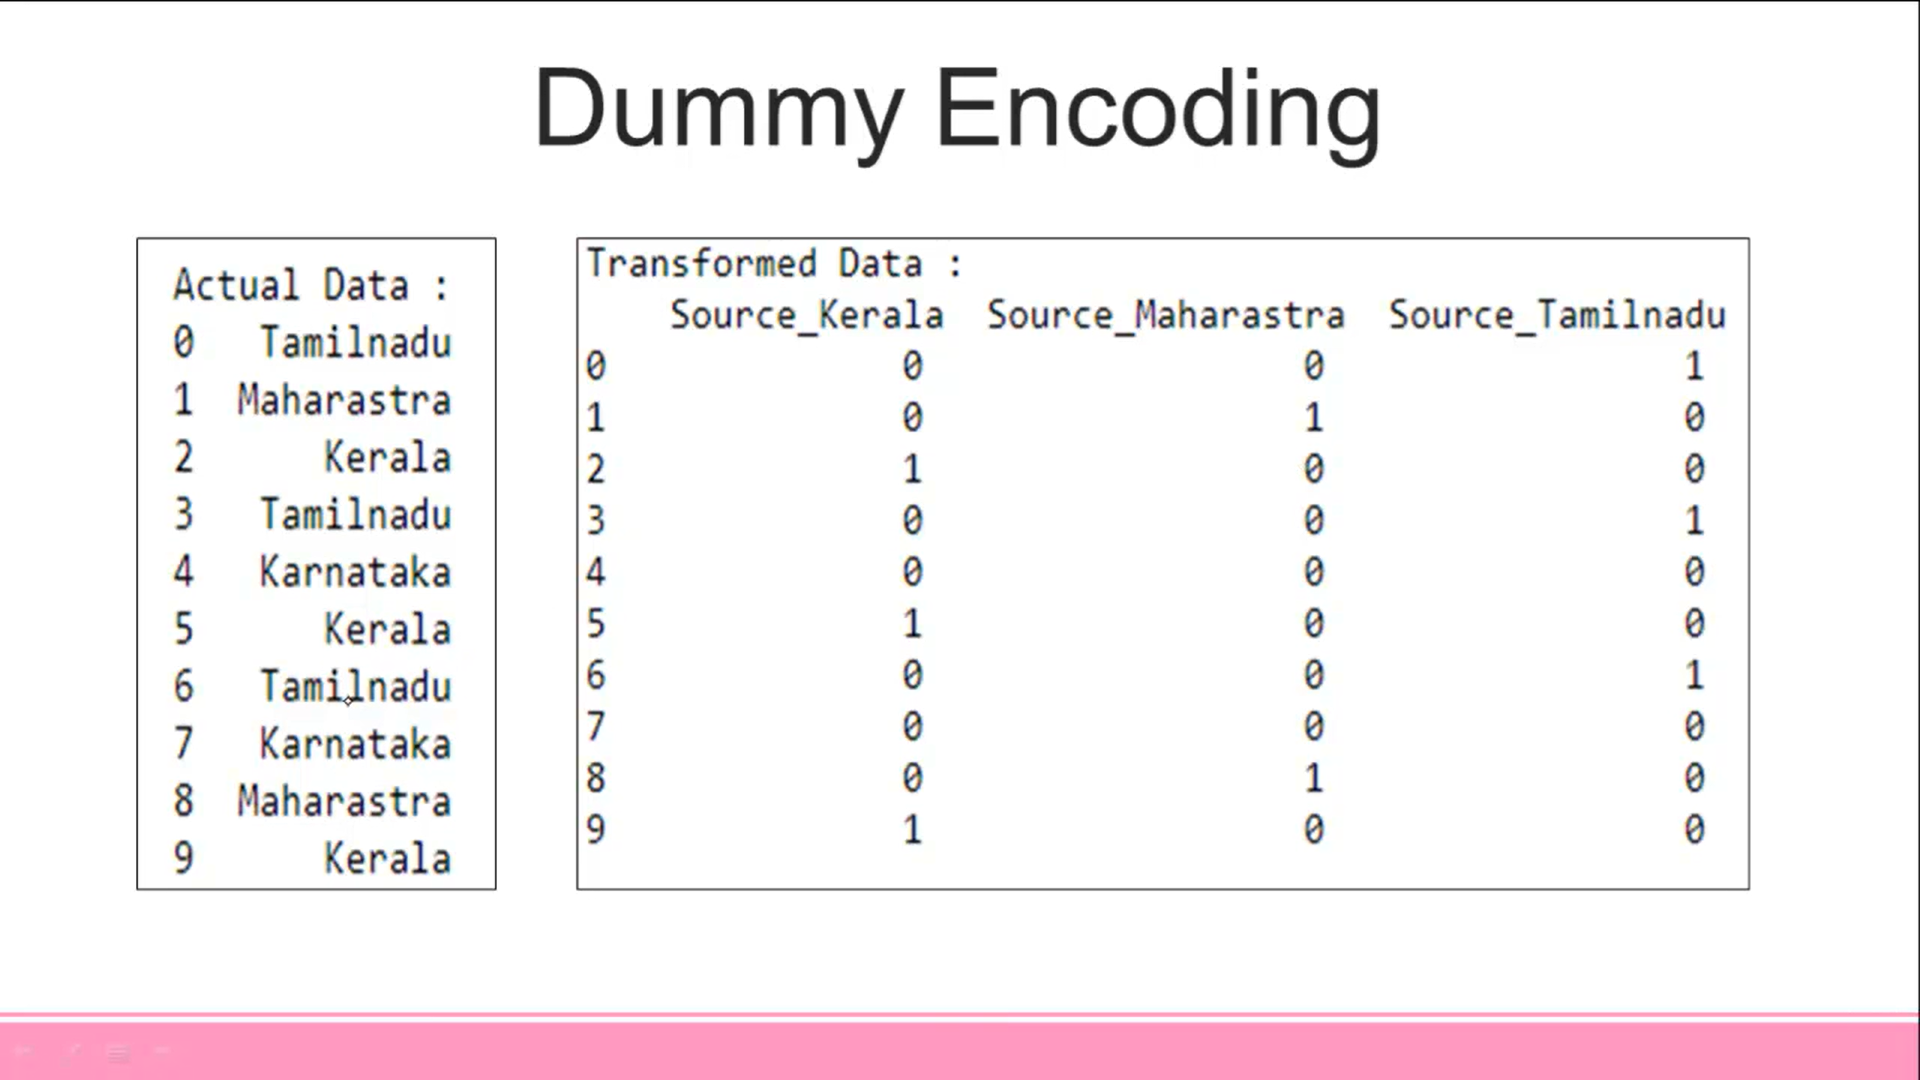

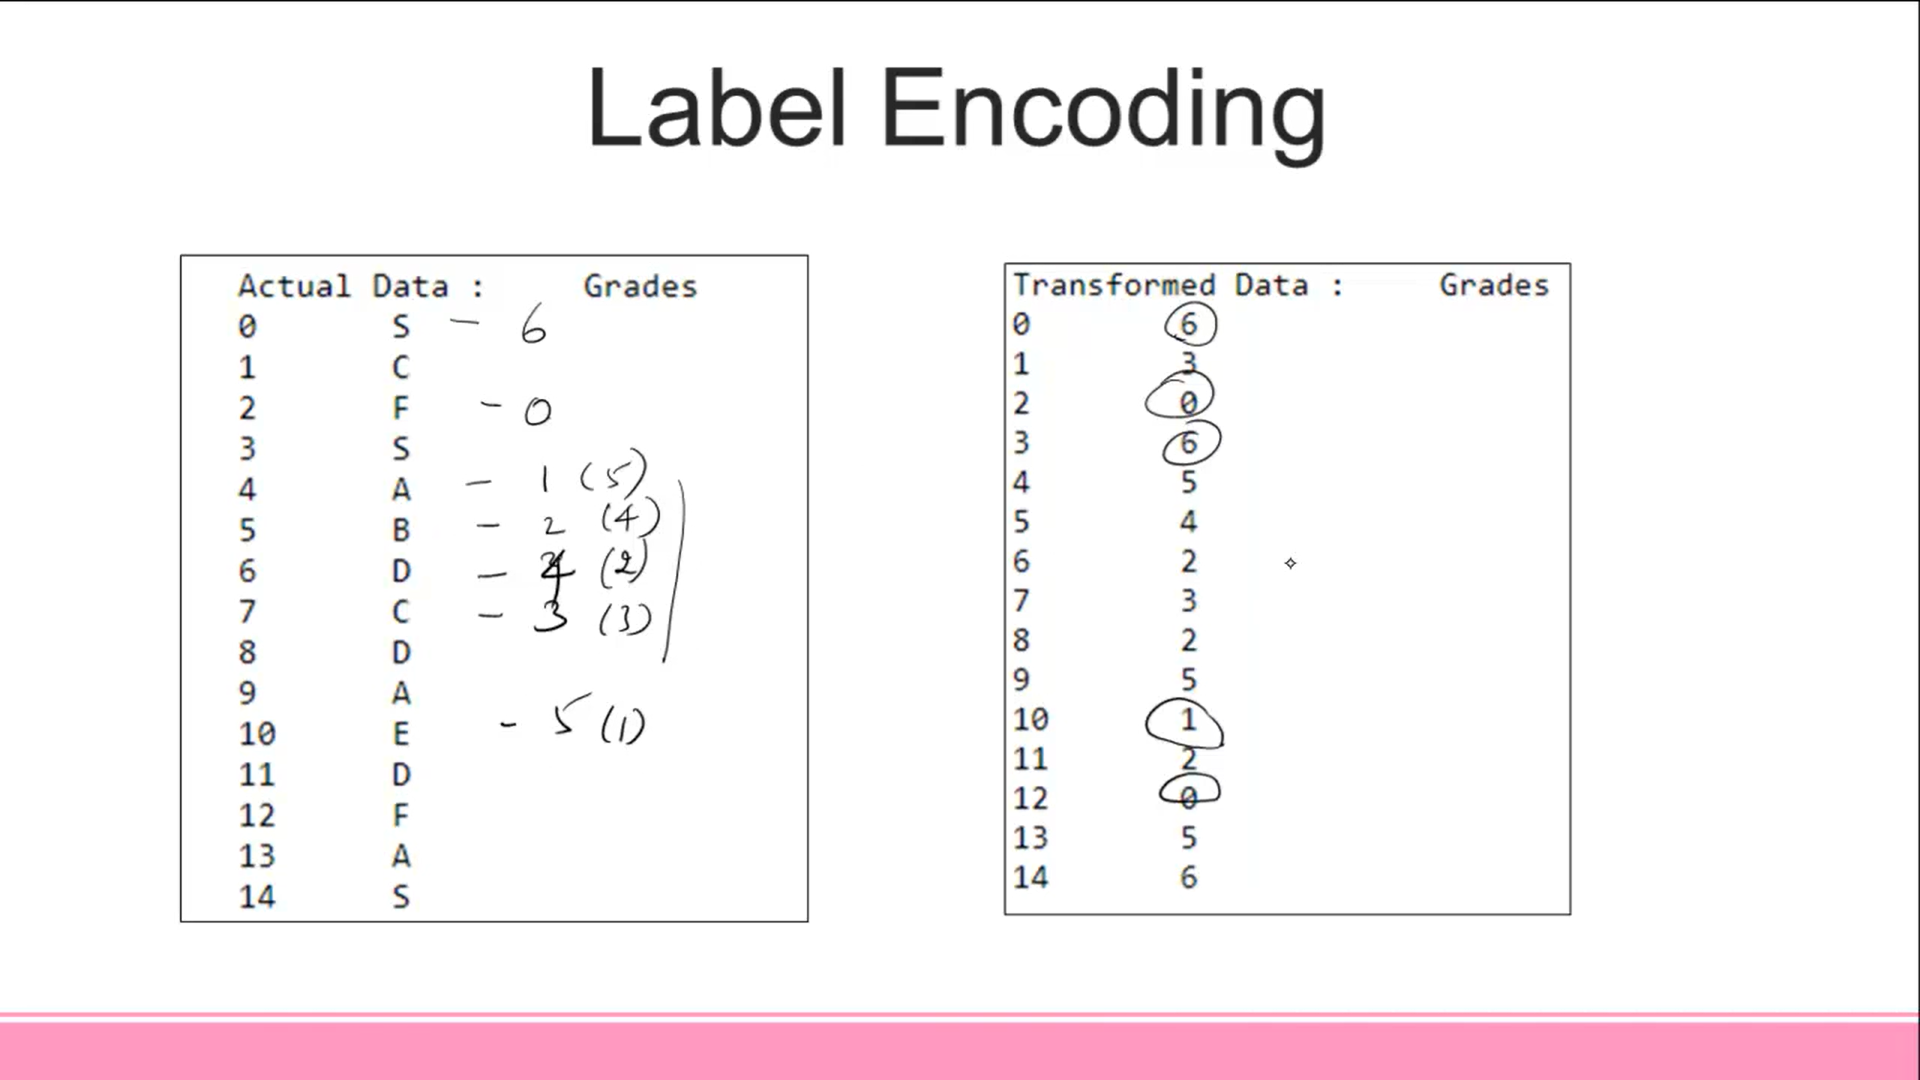

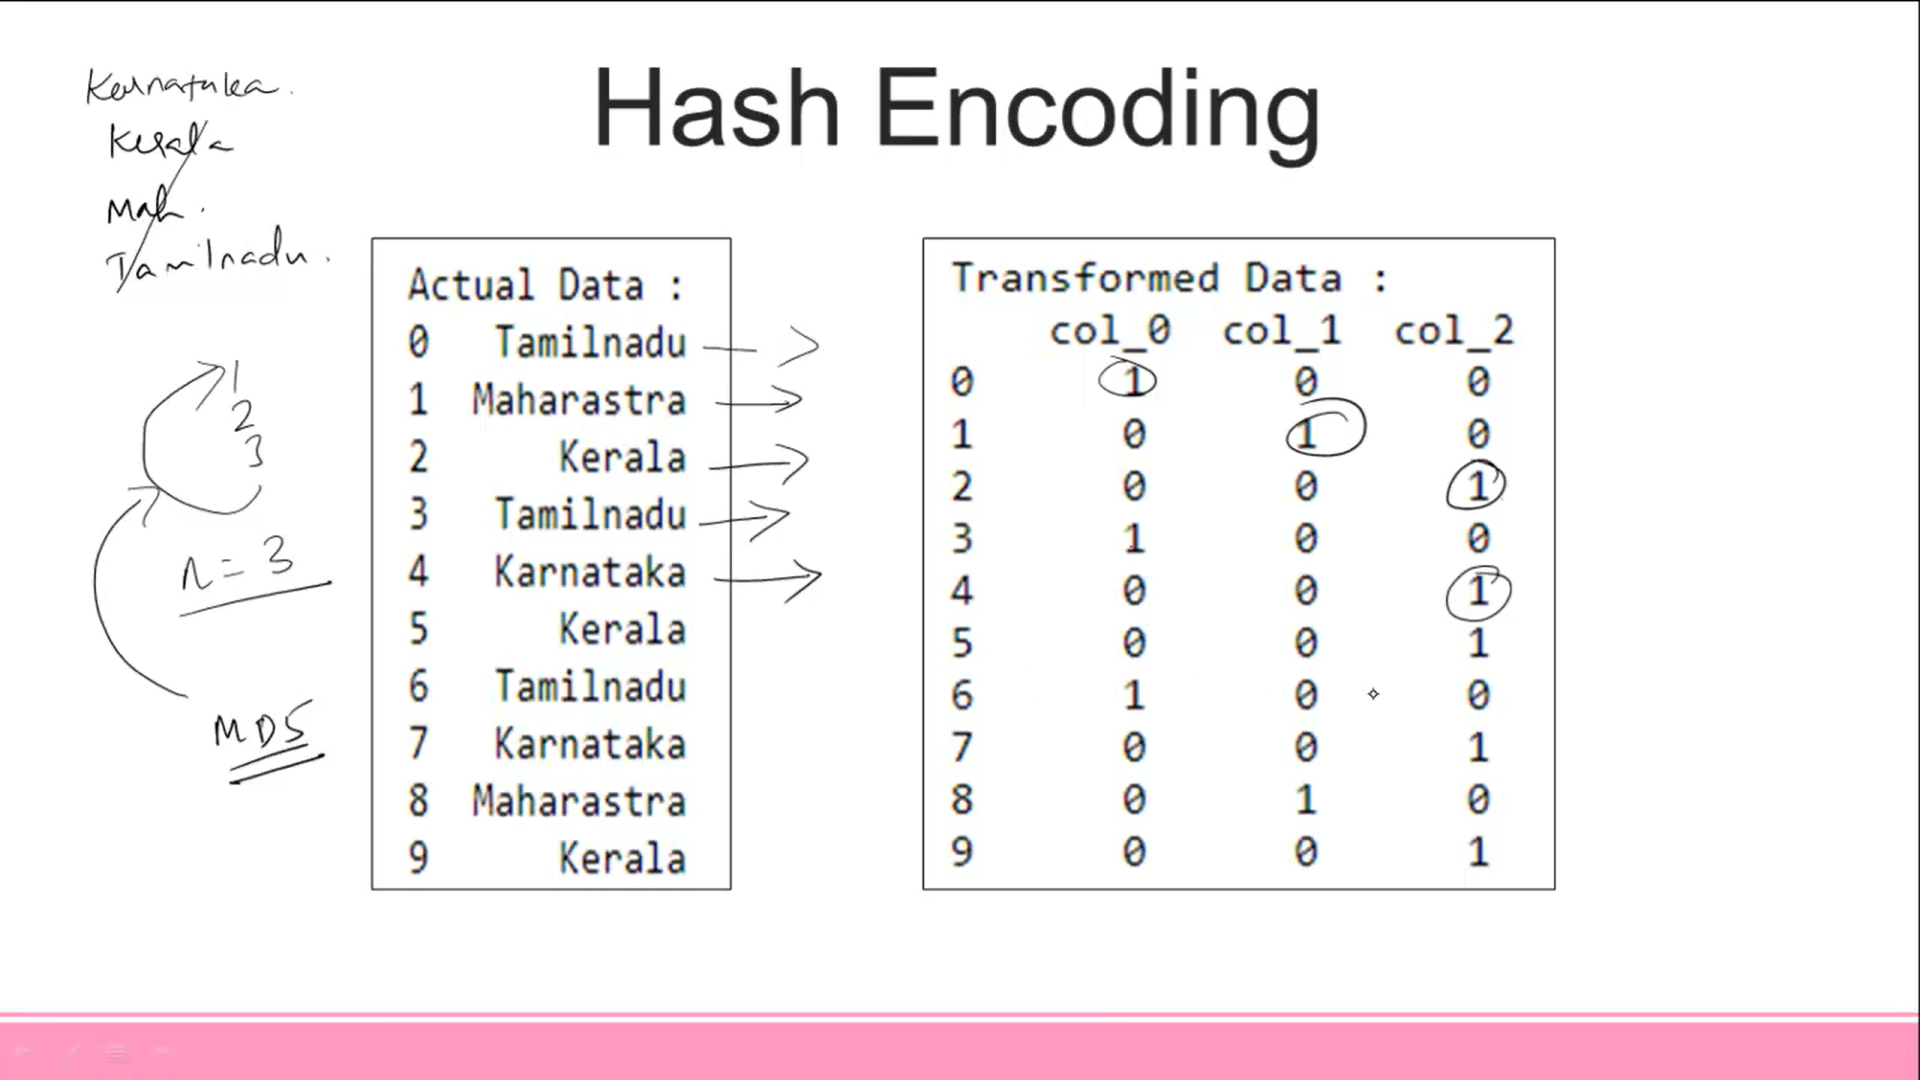

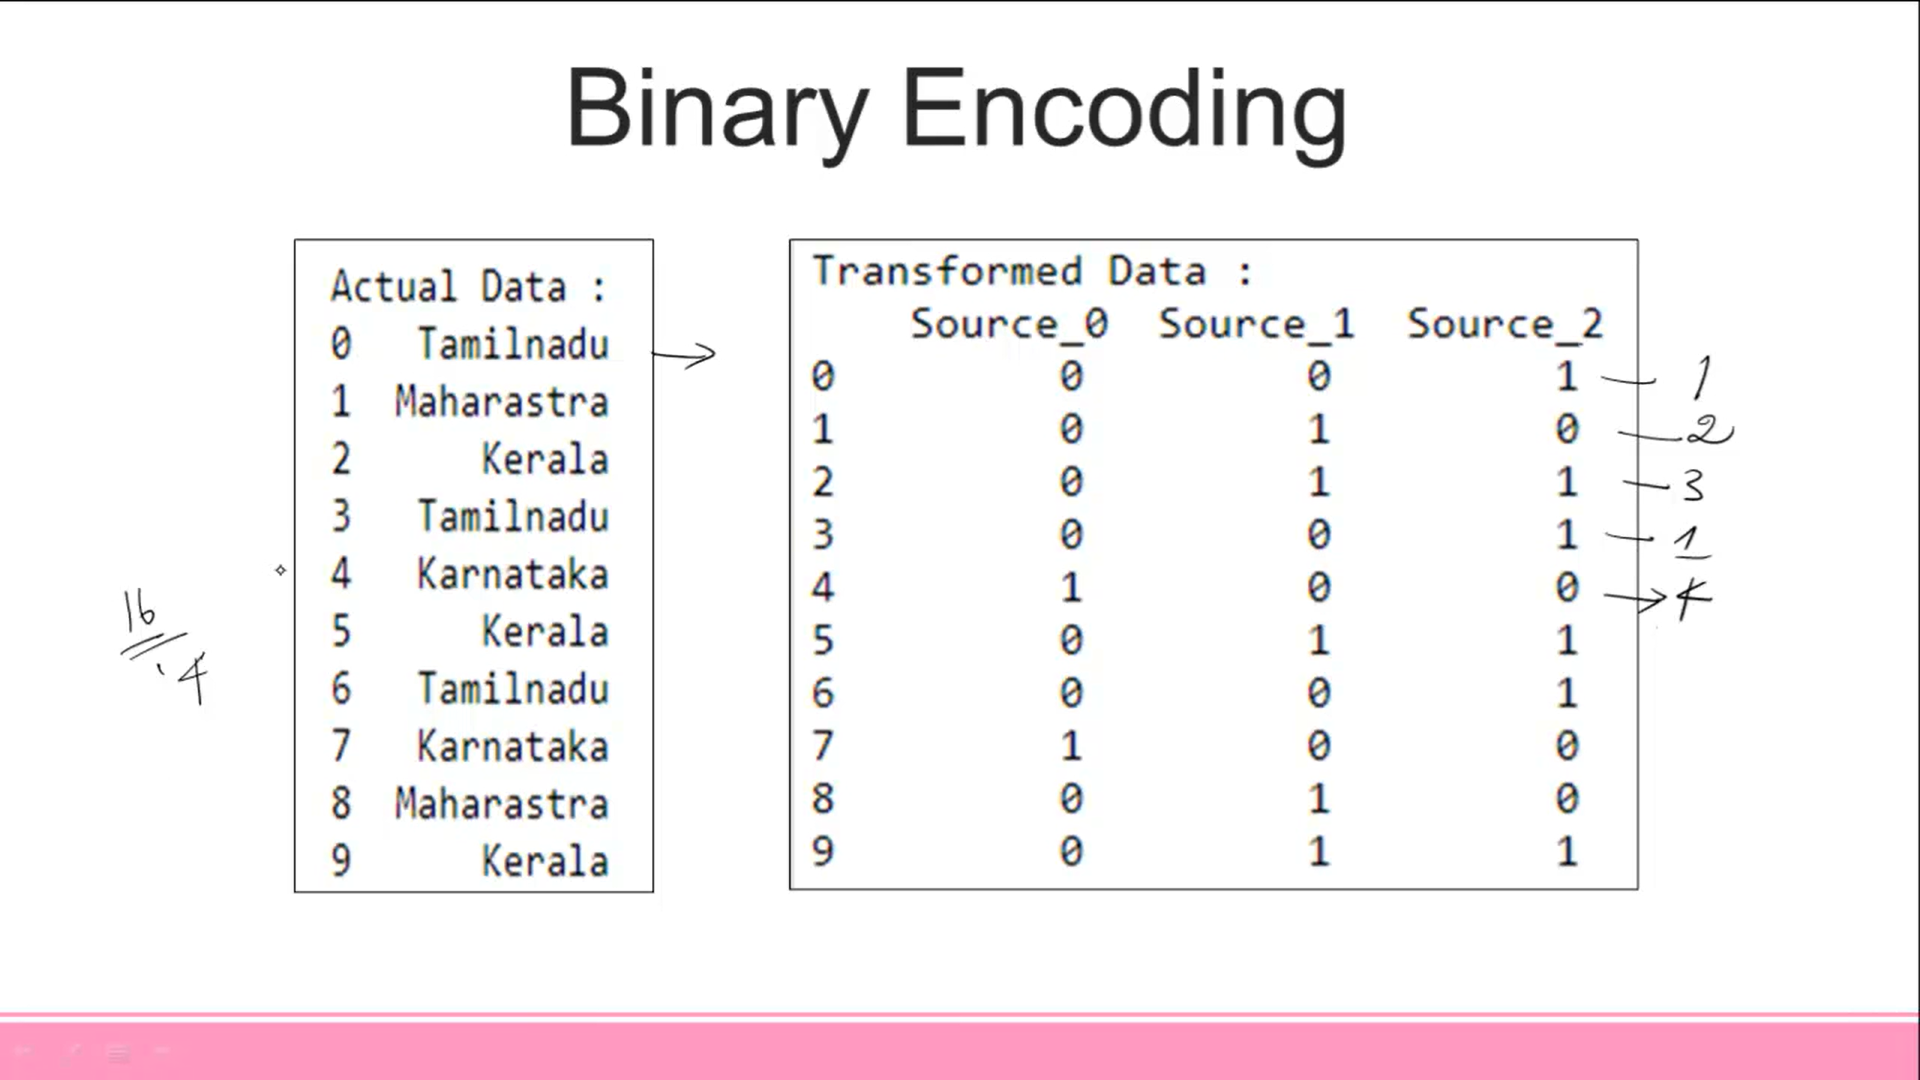

# advantage: reduce the number of columns

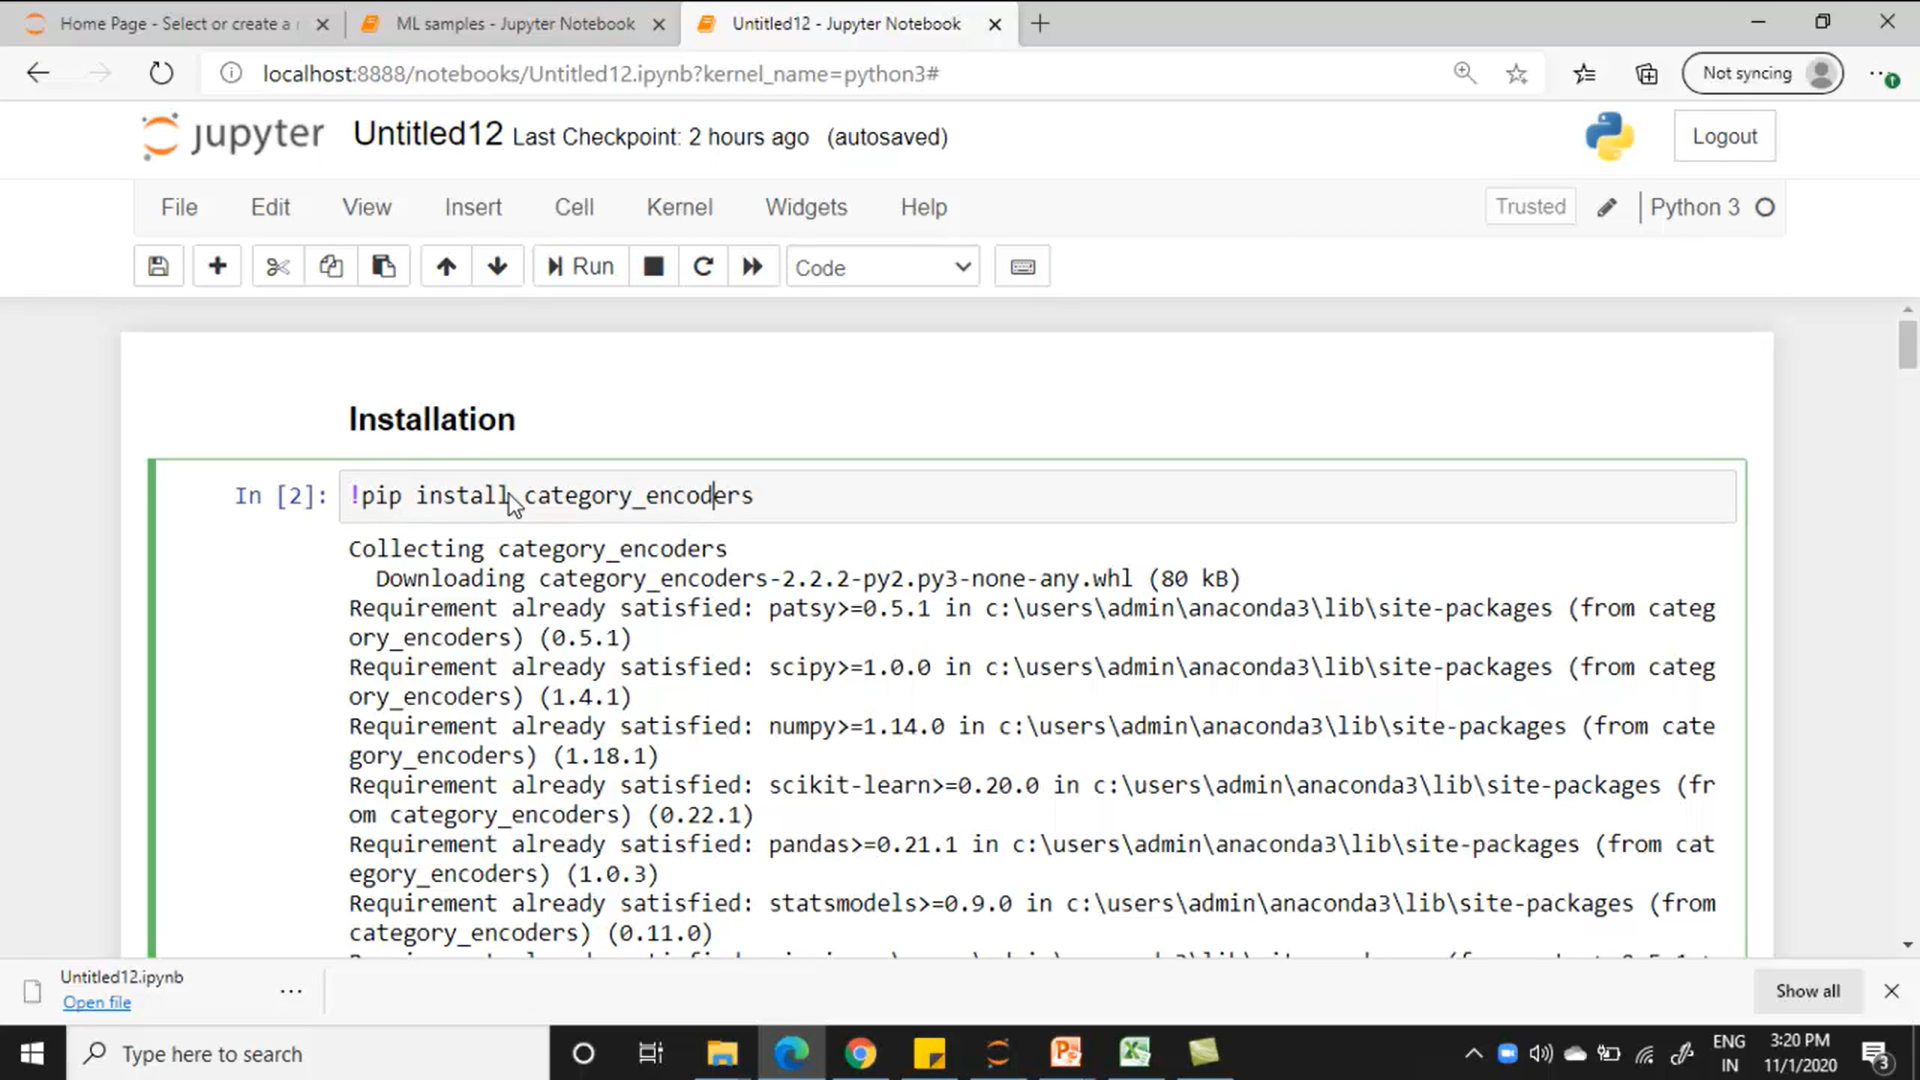

https://www.youtube.com/watch?v=B1CU7s2Fktk

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#converting categorical values to numerical values

In [15]:
df=pd.read_excel("enco.xlsx")
df

id bin_1 bin_2  nom_0 ord_2
0   0     F     N    Red   Hot
1   1     F     Y   Blue  Warm
2   2     F     N   Blue  Cold
3   3     F     N  Green  Warm
4   4     T     N    Red  Cold
5   5     T     N  Green   Hot
6   6     F     N    Red  Cold
7   7     F     N    Red  Cold
8   8     T     N   Blue  Warm
9   9     T     Y    Red   Hot

In [3]:
#pip install openpyxl

# Dummy Encodig 

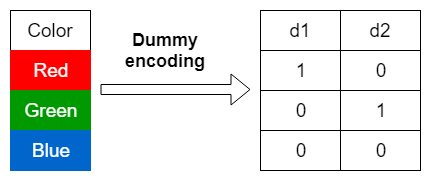

Convert categorical variable into dummy/indicator variables.

In [7]:
df.columns

Index(['id', 'bin_1', 'bin_2', 'nom_0', 'ord_2'], dtype='object')

In [9]:
pd.get_dummies(df['bin_1']).head()

F  T
0  1  0
1  1  0
2  1  0
3  1  0
4  0  1

In [10]:
pd.get_dummies(df['bin_1'],drop_first=True).head()

T
0  0
1  0
2  0
3  0
4  1

# Label Encoding

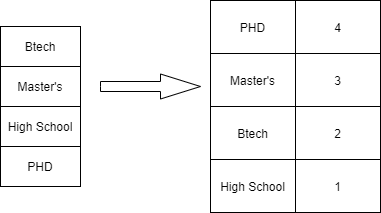

In [4]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['ord_2']=le.fit_transform(df['ord_2'])
df

id bin_1 bin_2  nom_0  ord_2
0   0     F     N    Red      1
1   1     F     Y   Blue      2
2   2     F     N   Blue      0
3   3     F     N  Green      2
4   4     T     N    Red      0
5   5     T     N  Green      1
6   6     F     N    Red      0
7   7     F     N    Red      0
8   8     T     N   Blue      2
9   9     T     Y    Red      1

# OneHot Encoding

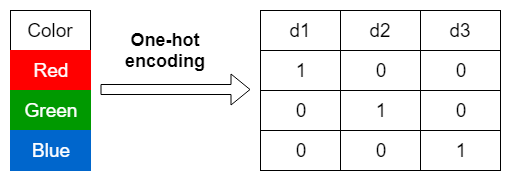

In [16]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()

enc=enc.fit_transform(df[['nom_0']]).toarray() #converting the encoded result into array

#enc(type)

encoded_col=pd.DataFrame(enc) #converting it into dataframe

In [17]:
df=pd.concat([df,encoded_col],axis=1) #concatinating the encoded values tothe data
df.head()

id bin_1 bin_2  nom_0 ord_2    0    1    2
0   0     F     N    Red   Hot  0.0  0.0  1.0
1   1     F     Y   Blue  Warm  1.0  0.0  0.0
2   2     F     N   Blue  Cold  1.0  0.0  0.0
3   3     F     N  Green  Warm  0.0  1.0  0.0
4   4     T     N    Red  Cold  0.0  0.0  1.0

In [18]:
df=df.drop(['nom_0'],axis=1)

In [19]:
df.head(10)

id bin_1 bin_2 ord_2    0    1    2
0   0     F     N   Hot  0.0  0.0  1.0
1   1     F     Y  Warm  1.0  0.0  0.0
2   2     F     N  Cold  1.0  0.0  0.0
3   3     F     N  Warm  0.0  1.0  0.0
4   4     T     N  Cold  0.0  0.0  1.0
5   5     T     N   Hot  0.0  1.0  0.0
6   6     F     N  Cold  0.0  0.0  1.0
7   7     F     N  Cold  0.0  0.0  1.0
8   8     T     N  Warm  1.0  0.0  0.0
9   9     T     Y   Hot  0.0  0.0  1.0